In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


In [3]:
import pandas as pd

csv_file_path = 'movie_data.csv'

df = pd.read_csv(csv_file_path, encoding='latin-1')
df.tail()


C:\Users\VJ_Mahesh\AppData\Local\Temp\ipykernel_16884\479091296.py:7: DtypeWarning: Columns (26,27,28,29,30,32,34,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding='latin-1')


,ID,Title,Genre,Plot,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
54208,54210,Bonino (1953),comedy,This short-lived NBC live sitcom centered on B...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54209,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54210,54212,Ronald Goedemondt,Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54211,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54212,54214,Nature's Fury,Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense h...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54213 non-null  object 
 1   Title        54213 non-null  object 
 2   Genre        54207 non-null  object 
 3   Plot         54197 non-null  object 
 4   Unnamed: 4   11401 non-null  object 
 5   Unnamed: 5   2432 non-null   object 
 6   Unnamed: 6   642 non-null    object 
 7   Unnamed: 7   255 non-null    object 
 8   Unnamed: 8   140 non-null    object 
 9   Unnamed: 9   89 non-null     object 
 10  Unnamed: 10  63 non-null     object 
 11  Unnamed: 11  48 non-null     object 
 12  Unnamed: 12  40 non-null     object 
 13  Unnamed: 13  33 non-null     object 
 14  Unnamed: 14  28 non-null     object 
 15  Unnamed: 15  22 non-null     object 
 16  Unnamed: 16  17 non-null     object 
 17  Unnamed: 17  14 non-null     object 
 18  Unnamed: 18  12 non-null     object 
 19  Unna

In [5]:
df['Genre']=df['Genre'].replace('unknown',np.nan)
df=df.dropna(axis=0, subset=['Genre'])
print(df.tail())

          ID                        Title                        Genre  \
54208  54210                Bonino (1953)                       comedy   
54209  54211  Dead Girls Don't Cry (????)                       horror   
54210  54212            Ronald Goedemondt       Ze bestaan echt (2008)   
54211  54213     Make Your Own Bed (1944)                       comedy   
54212  54214                Nature's Fury  Storm of the Century (2006)   

                                                    Plot  \
54208  This short-lived NBC live sitcom centered on B...   
54209  The NEXT Generation of EXPLOITATION. The siste...   
54210                                        documentary   
54211  Walter and Vivian live in the country and have...   
54212                                            history   

                                              Unnamed: 4 Unnamed: 5  \
54208                                                NaN        NaN   
54209                                               

In [6]:
print(len(df))
print(df.shape)
a=df['Genre'].value_counts()[:20]
b=a.keys().tolist()
print(b)
df=df[df.Genre.isin(b)]
df=df.reset_index(drop=True)

54207
(54207, 40)
['drama', 'documentary', 'comedy', 'short', 'horror', 'thriller', 'action', 'western', 'reality-tv', 'family', 'adventure', 'romance', 'sci-fi', 'adult', 'crime', 'music', 'animation', 'talk-show', 'sport', 'mystery']


C:\Users\VJ_Mahesh\AppData\Local\Temp\ipykernel_16884\3462301063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Genre", x="Count", data=genre_to_count,palette="Blues_d")


<Axes: xlabel='Count', ylabel='Genre'>

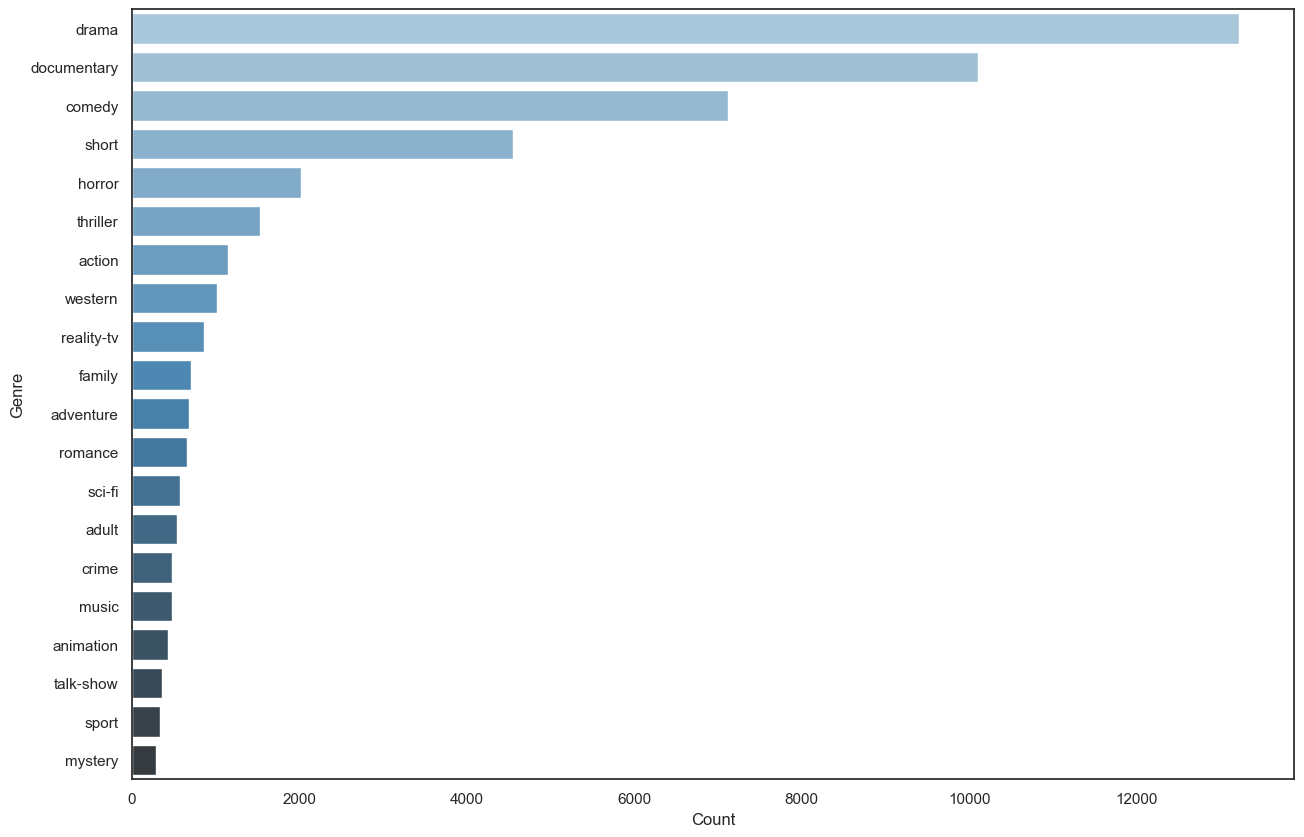

In [7]:
sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':a.index, 'Count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="Genre", x="Count", data=genre_to_count,palette="Blues_d")


In [58]:
def plotToWords(raw_plot):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_plot)
    lower_case = letters_only.lower()
    words = lower_case.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

def preprocess(dataframe):
    clean_train_reviews = []
    for i in range(0,len(dataframe)):
        clean_train_reviews.append(plotToWords(dataframe.iloc[i]['Plot']))
    dataframe['Plot']=clean_train_reviews
    return dataframe

df=preprocess(df)
print(df["Plot"][:10])

0    brother sister past incestuous relationship cu...
1    bus empties students field trip museum natural...
2    help unemployed father make ends meet edith tw...
3    film title refers un recovered bodies ground z...
4    quality control consists series mm single take...
5    tough economic times max joey run ideas discov...
6    ron petrie keanu reeves troubled teen whose li...
7    sudden calamitous event causing great loss lif...
8    four high school students embark terrifying jo...
9    danny dying aids returns home last months alwa...
Name: Plot, dtype: object


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), max_features=4000)
features = tfidf.fit_transform(df.Plot).toarray()
labels = df.Genre
features.shape

(47080, 4000)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [56]:
print(clf.predict(count_vect.transform(["sanford"])))

['documentary']
